In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
df  = pd.read_excel('Pizza_Sale.xlsx')
df2 = pd.read_excel('Pizza_ingredients.xlsx')

In [26]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.shape

(48620, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [6]:
df.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [155]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [156]:
# Step 1: Create a reference dataframe and drop duplicates
df_reference = df.dropna(subset=['pizza_name_id', 'pizza_name', 'pizza_category', 'pizza_ingredients','total_price']).drop_duplicates()

# Ensure no duplicates in the reference dataframe for mapping
df_reference = df_reference.groupby('pizza_name_id').first().reset_index()
df_reference_name_to_id = df_reference.groupby('pizza_name').first().reset_index()

In [157]:
# Step 2: Fill missing values in the original dataframe
# Fill missing 'pizza_name' using the reference dataframe's pizza_name_id to pizza_name mapping
df['pizza_name'] = df['pizza_name'].fillna(df['pizza_name_id'].map(df_reference.set_index('pizza_name_id')['pizza_name']))

In [158]:
# Fill missing 'pizza_name_id' using the reference dataframe's pizza_name to pizza_name_id mapping
df['pizza_name_id'] = df['pizza_name_id'].fillna(df['pizza_name'].map(df_reference_name_to_id.set_index('pizza_name')['pizza_name_id']))

In [159]:
# Fill missing 'pizza_category' and 'pizza_ingredients'
df['pizza_category'] = df['pizza_category'].fillna(df['pizza_name_id'].map(df_reference.set_index('pizza_name_id')['pizza_category']))
df['pizza_ingredients'] = df['pizza_ingredients'].fillna(df['pizza_name_id'].map(df_reference.set_index('pizza_name_id')['pizza_ingredients']))

In [160]:
# Fill missing 'pizza_category' and 'pizza_ingredients' using pizza_name
df['pizza_category'] = df['pizza_category'].fillna(df['pizza_name'].map(df_reference_name_to_id.set_index('pizza_name')['pizza_category']))
df['pizza_ingredients'] = df['pizza_ingredients'].fillna(df['pizza_name'].map(df_reference_name_to_id.set_index('pizza_name')['pizza_ingredients']))

In [161]:
# Fill missing 'total_price' using 'unit_price'
df['total_price'] = df['total_price'].fillna(df['unit_price'])

In [84]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [36]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


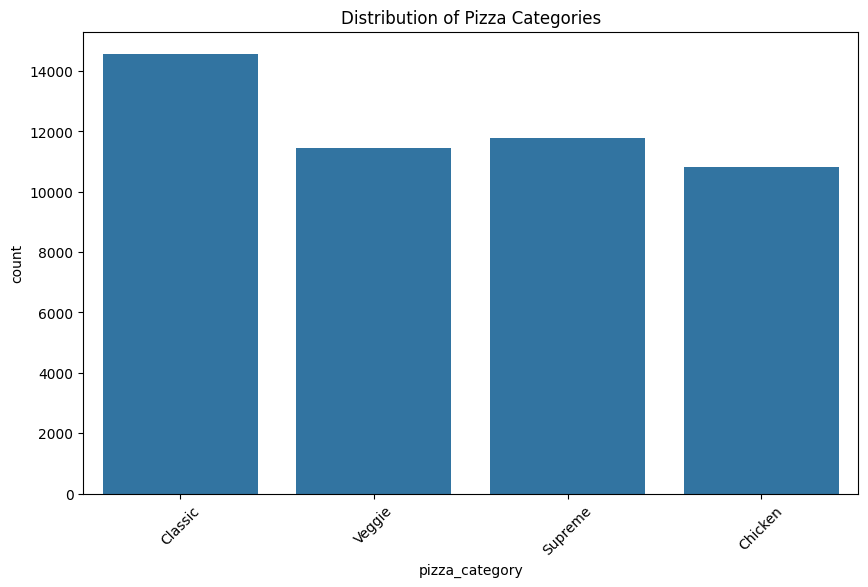

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pizza_category')
plt.xticks(rotation=45)
plt.title('Distribution of Pizza Categories')
plt.show()

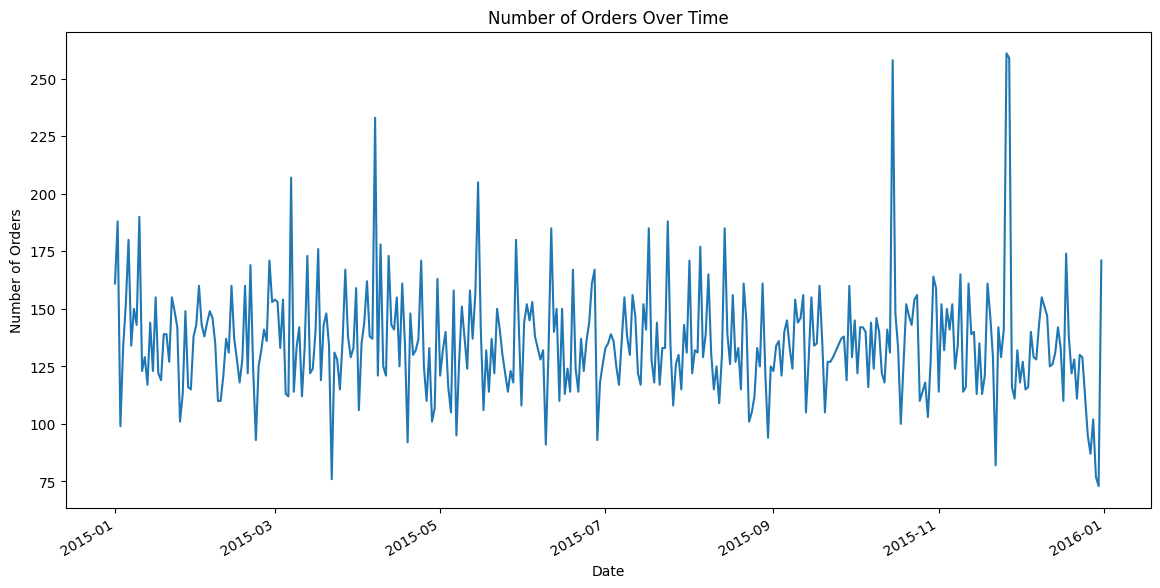

In [17]:
df['order_date'] = pd.to_datetime(df['order_date'])
orders_per_day = df.groupby('order_date').size()

plt.figure(figsize=(14, 7))
orders_per_day.plot()
plt.title('Number of Orders Over Time')
plt.ylabel('Number of Orders')
plt.xlabel('Date')
plt.show()

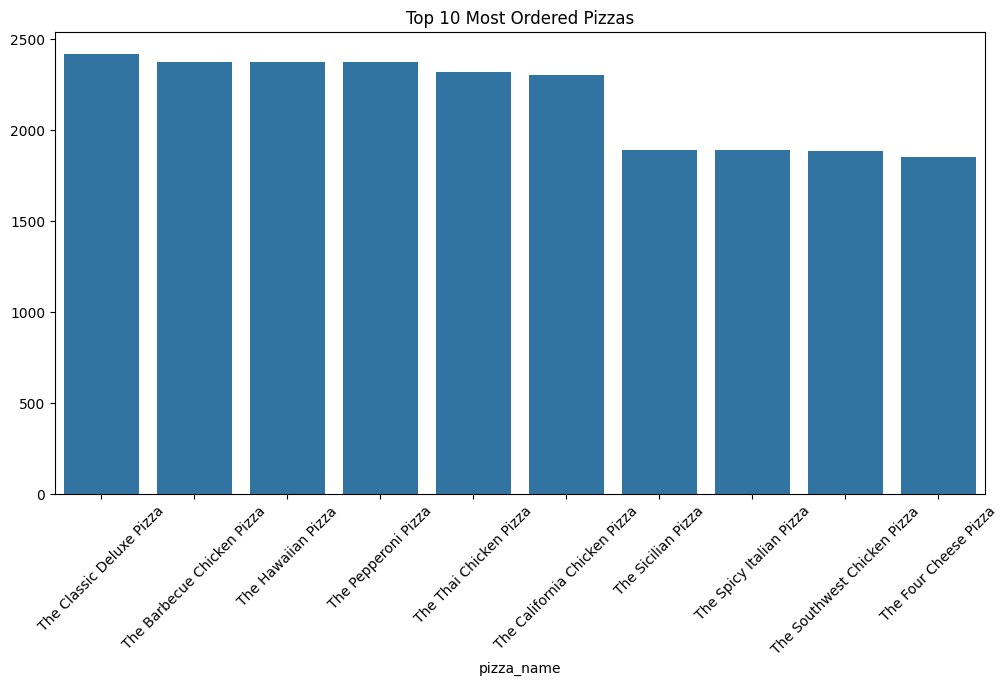

In [18]:
top_pizzas = df['pizza_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pizzas.index, y=top_pizzas.values)
plt.xticks(rotation=45)
plt.title('Top 10 Most Ordered Pizzas')
plt.show()

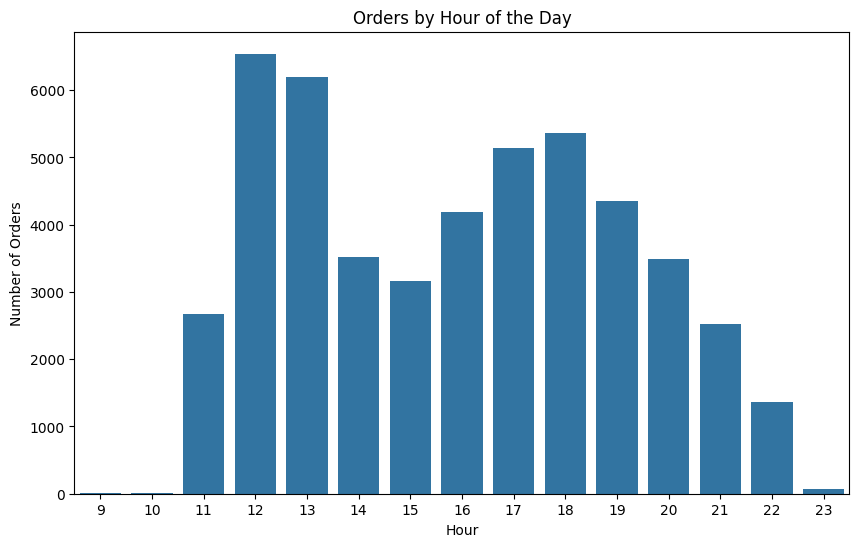

In [19]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')
df['hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('hour').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values)
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

In [162]:
from pandas.tseries.holiday import USFederalHolidayCalendar

In [163]:
# 1. Extract Day of the Week
df['day_of_week'] = df['order_date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# 2. Extract Month
df['month'] = df['order_date'].dt.month

# 3. Extract Hour of the Day
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')
df['hour'] = df['order_time'].dt.hour

In [164]:
# 4. Create a "Promotional Period" feature (example: set 1 for promotional days)
promotional_dates = pd.date_range(start='2015-06-01', end='2015-06-30')  # Example promo period in June
df['is_promo'] = df['order_date'].isin(promotional_dates).astype(int)

In [165]:
# 5. Create Holiday Feature (for US Federal Holidays)
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2015-01-01', end='2015-12-31')
df['is_holiday'] = df['order_date'].isin(holidays).astype(int)

In [ ]:
# 4. Create a "Promotional Period" feature (example: set 1 for promotional days)
promotional_dates = pd.date_range(start='2015-06-01', end='2015-06-30')  # Example promo period in June
df['is_promo'] = df['order_date'].isin(promotional_dates).astype(int)

In [166]:
# 6. Feature for "Weekend" (1 for Saturday and Sunday)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


In [167]:
# 7. Example of a Feature for the "End of Month" (pizza orders near month end)
df['is_end_of_month'] = df['order_date'].dt.is_month_end.astype(int)

In [91]:
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,month,hour,is_promo,is_holiday,is_weekend,is_end_of_month
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,1900-01-01 21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,3,12,21,0,0,0,1
48616,48617,21348,four_cheese_l,1,2015-12-31,1900-01-01 21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,3,12,21,0,0,0,1
48617,48618,21348,napolitana_s,1,2015-12-31,1900-01-01 21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,3,12,21,0,0,0,1
48618,48619,21349,mexicana_l,1,2015-12-31,1900-01-01 22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3,12,22,0,0,0,1
48619,48620,21350,bbq_ckn_s,1,2015-12-31,1900-01-01 23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,3,12,23,0,0,0,1


In [168]:
df['total_sales'] = df['quantity'] * df['total_price']  # Assuming you have 'quantity' and 'price' columns


In [212]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Create a temporary dataframe to resample the data using 'order_date' as the index
df_temp = df.set_index('order_date')

# Resample the data to aggregate sales to daily (without dropping 'order_date' in the original dataframe)
df_daily_sales = df_temp['total_sales'].resample('D').sum().reset_index()

# Ensure 'total_sales' is numeric
df_daily_sales['total_sales'] = pd.to_numeric(df_daily_sales['total_sales'], errors='coerce')

# Drop any rows with missing values in 'total_sales'
df_daily_sales = df_daily_sales.dropna(subset=['total_sales'])

# Split into training and test sets
train_size = int(len(df_daily_sales) * 0.8)
train, test = df_daily_sales['total_sales'][:train_size], df_daily_sales['total_sales'][train_size:]

# ARIMA model training
model = ARIMA(train, order=(5, 1, 0))  # (p,d,q) parameters can be tuned further
arima_model = model.fit()

# ARIMA model prediction
arima_forecast = arima_model.forecast(steps=len(test))

# Evaluation (using MAPE)
mape_arima = mean_absolute_percentage_error(test, arima_forecast)
print(f"MAPE for ARIMA: {mape_arima}")


MAPE for ARIMA: 3.44785661016083e+17


In [170]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA model training
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()  # Tune these params

# SARIMA model prediction
sarima_forecast = sarima_model.forecast(steps=len(test))

# Evaluation (using MAPE)
mape_sarima = mean_absolute_percentage_error(test, sarima_forecast)
print(f"MAPE for SARIMA: {mape_sarima}")


MAPE for SARIMA: 4.039278875771128e+17


In [ ]:
from prophet import Prophet

df_fb = df.rename(columns={'order_date':'ds','total_sales':'y'})

train_fb = df_fb[:48620]
test_fb = df_fb[48620:]

model2 = Prophet()
model2.fit(train_fb)

future = model2.make_future_dataframe(periods=300)
forecast_fb = model2.predict(future)

In [ ]:
train_fb['ds'] = pd.to_datetime(train_fb['ds'], format='%Y-%m-%d')
test_fb['ds'] = pd.to_datetime(test_fb['ds'], format='%Y-%m-%d')

In [188]:
# Sample daily sales data setup (assuming df_daily_sales is your daily sales data)
df_daily_sales = pd.Series(np.random.rand(365), index=pd.date_range(start='2015-01-01', periods=365, freq='D'))

# Ensure the index is of type DatetimeIndex
if not isinstance(df_daily_sales.index, pd.DatetimeIndex):
    df_daily_sales.index = pd.to_datetime(df_daily_sales.index)


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [189]:
# Generate future dates (next 7 days)
future_dates = pd.date_range(start=df_daily_sales.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')

# Forecast the next 7 days
forecast = arima_model.forecast(steps=7)

# Create DataFrame for forecasts
forecast_df = pd.DataFrame({
    'date': future_dates,
    'forecast': forecast
})


In [191]:
import numpy as np

# Get unique pizza categories
pizza_types = df['pizza_name'].unique()

# Repeat pizza categories to match the length of forecast_df
repeated_pizza_types = np.tile(pizza_types, len(forecast_df) // len(pizza_types) + 1)[:len(forecast_df)]

# Assign the repeated pizza types to the forecast DataFrame
forecast_df['pizza_name'] = repeated_pizza_types


In [209]:
# Merge forecast with ingredients dataset on 'pizza_name'
merged_data = pd.merge(forecast_df, df2, on='pizza_name')

# Calculate the total ingredient requirement based on forecasted sales for each date
merged_data['total_ingredient_required'] = merged_data['forecast'] * merged_data['Items_Qty_In_Grams']

# Summarize the total ingredient requirement by date, pizza name, and pizza ingredients
purchase_order = merged_data.groupby(['date','pizza_name','pizza_ingredients'])['total_ingredient_required'].sum().reset_index()
# Round the total_ingredient_required column to 4 decimal places
purchase_order['total_ingredient_required'] = purchase_order['total_ingredient_required'].round(2)



In [210]:
purchase_order

,date,pizza_name,pizza_ingredients,total_ingredient_required
0,2016-01-01,The Hawaiian Pizza,Mozzarella Cheese,112136.01
1,2016-01-01,The Hawaiian Pizza,Pineapple,168204.02
2,2016-01-01,The Hawaiian Pizza,Sliced Ham,0.00
3,2016-01-02,The Classic Deluxe Pizza,Bacon,663531.67
4,2016-01-02,The Classic Deluxe Pizza,Mushrooms,294902.96
5,2016-01-02,The Classic Deluxe Pizza,Pepperoni,294902.96
6,2016-01-02,The Classic Deluxe Pizza,Red Onions,294902.96
7,2016-01-02,The Classic Deluxe Pizza,Red Peppers,73725.74
8,2016-01-03,The Five Cheese Pizza,Blue Cheese,57756.45
9,2016-01-03,The Five Cheese Pizza,Garlic,28878.22


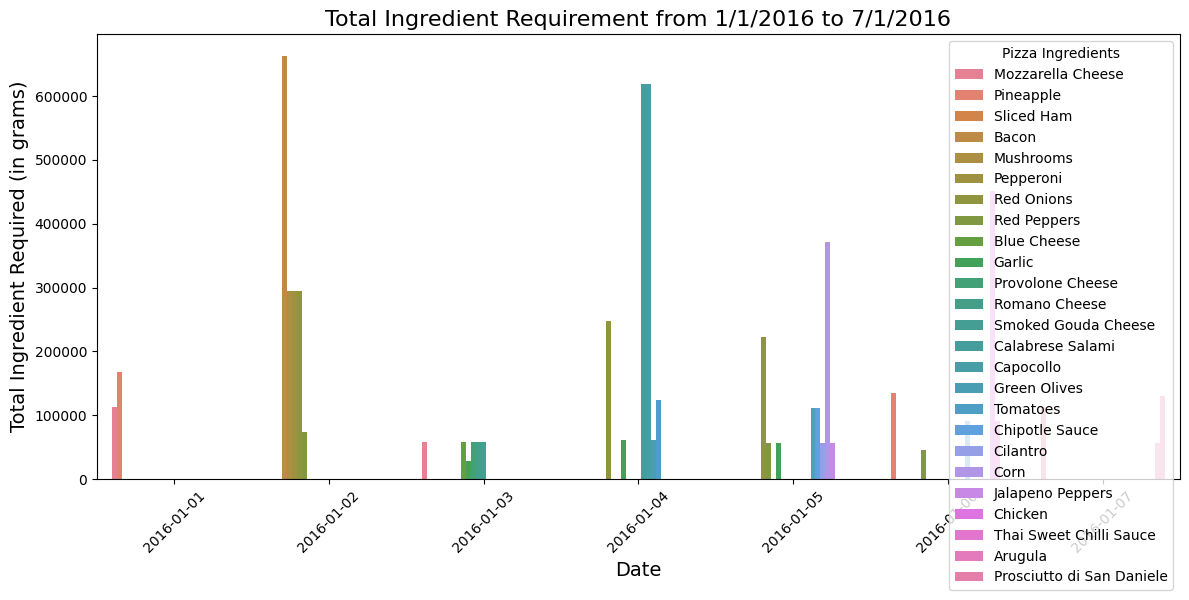

In [199]:
# Set plot size for better visualization
plt.figure(figsize=(12, 6))

# Plot a bar chart with total ingredients required per day
sns.barplot(
    x='date', 
    y='total_ingredient_required', 
    hue='pizza_ingredients', 
    data=purchase_order
)

# Set labels and title
plt.title('Total Ingredient Requirement from 1/1/2016 to 7/1/2016', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Ingredient Required (in grams)', fontsize=14)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)

# Show the legend and plot
plt.legend(title='Pizza Ingredients')
plt.tight_layout()
plt.show()
